# Data Analysis Project: IMDB MOVIES

### Import Packages

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

### Load dataset

In [2]:
df = pd.read_csv('C:/Users/dell/Downloads/data(1).csv')

### An overview of the data


In [3]:
df.head(10)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Years
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
5,Friday the 13th,R,Horror,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0,1980
6,The Blues Brothers,R,Action,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0,1980
7,Raging Bull,R,Biography,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0,1980
8,Superman II,PG,Action,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0,1981
9,The Long Riders,R,Biography,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0,1980


### Checking for missing values

In [4]:
for col in df.columns:
    number_null = df.loc[:, col].isnull().sum()
    perc_null = (number_null / df.shape[0]) * 100
    print('{} - {} - %{}'.format(col, number_null, round(perc_null,3)))

name - 0 - %0.0
rating - 0 - %0.0
genre - 0 - %0.0
released - 0 - %0.0
score - 0 - %0.0
votes - 0 - %0.0
director - 0 - %0.0
writer - 0 - %0.0
star - 0 - %0.0
country - 0 - %0.0
budget - 1991 - %26.862
gross - 0 - %0.0
company - 0 - %0.0
runtime - 0 - %0.0
Years - 0 - %0.0


In [5]:
#find distribution shape
print('Skewness :', round(df['budget'].skew(),3))

mean_budget = df['budget'].mean()
median_budget = df['budget'].median()

if mean_budget > median_budget:
    print('Mean is bigger than Median. Left skewed. Median for computing')
else:
    print('Mean is smaller than Median. Right skewed. Mean for imputing')

Skewness : 2.443
Mean is bigger than Median. Left skewed. Median for computing


#### Filling the null value with median

In [6]:
#impute with median
df['budget'] = df['budget'].fillna(median_budget).round(0)

#### Checking for null values again

In [7]:
for col in df.columns:
    number_null = df.loc[:, col].isnull().sum()
    perc_null = (number_null / df.shape[0]) * 100
    print('{} - {} - %{}'.format(col, number_null, round(perc_null,3)))

name - 0 - %0.0
rating - 0 - %0.0
genre - 0 - %0.0
released - 0 - %0.0
score - 0 - %0.0
votes - 0 - %0.0
director - 0 - %0.0
writer - 0 - %0.0
star - 0 - %0.0
country - 0 - %0.0
budget - 0 - %0.0
gross - 0 - %0.0
company - 0 - %0.0
runtime - 0 - %0.0
Years - 0 - %0.0


#### Checking for duplicate rows


In [8]:
def has_duplicate_rows(data):
    df = pd.DataFrame(data)
    duplicate_rows = df.duplicated()
    return any(duplicate_rows)

has_duplicate_rows(df)

False

In [9]:
df.rating.value_counts(dropna=False).head(5)
#round((df['rating'].value_counts()/df['rating'].count())*100, 0)


R            3608
PG-13        2089
PG           1220
Not Rated     258
G             152
Name: rating, dtype: int64

<Axes: >

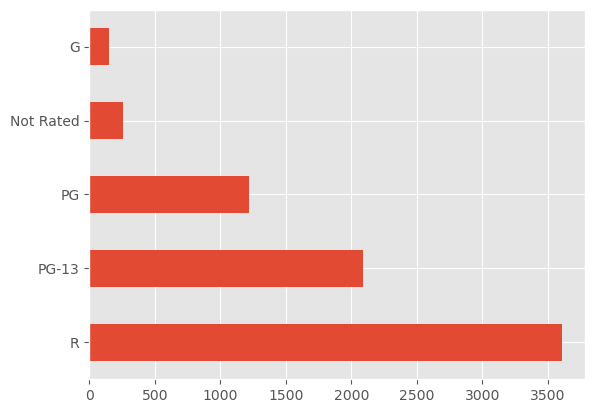

In [10]:
df.rating.value_counts(dropna=False).head(5).plot(kind="barh", fontsize=10)

In [11]:
df.genre.value_counts(dropna=False).head(5)

Comedy       2182
Action       1666
Drama        1439
Crime         536
Biography     429
Name: genre, dtype: int64

<Axes: >

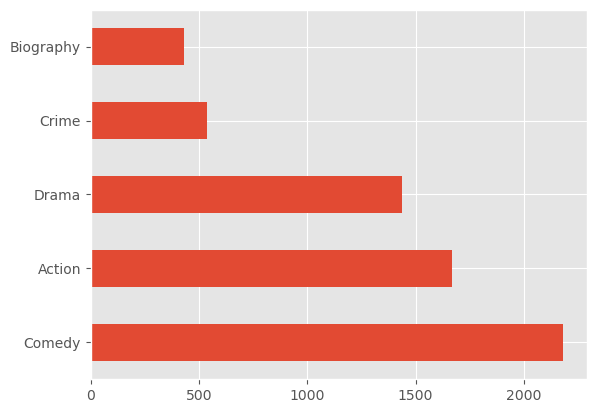

In [12]:
df.genre.value_counts(dropna=False).head(5).plot(kind="barh", fontsize=10)

In [13]:
df.country.value_counts(dropna=False).head(5)

United States     5358
United Kingdom     790
France             255
Canada             181
Germany            114
Name: country, dtype: int64

<Axes: >

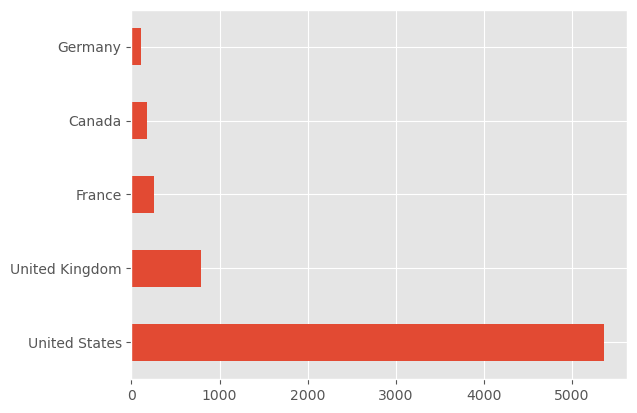

In [14]:
df.country.value_counts(dropna=False).head(5).plot(kind="barh", fontsize=10)

In [15]:
df.Years.value_counts(dropna=False).head(5)

2015    210
2011    210
2007    210
2019    209
2003    204
Name: Years, dtype: int64

<Axes: >

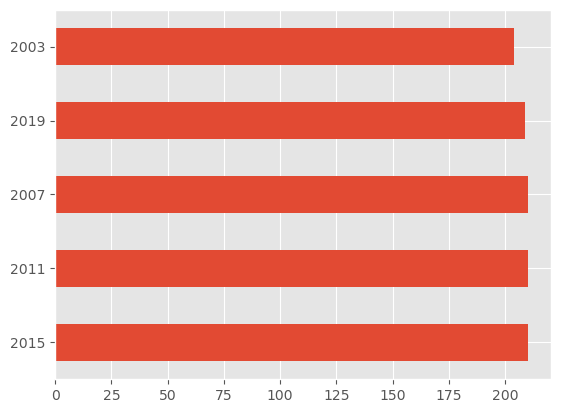

In [16]:
df.Years.value_counts(dropna=False).head(5).plot(kind="barh", fontsize=10)

In [17]:
df.runtime.value_counts(dropna=False).head(5)

97.0     233
98.0     216
100.0    214
96.0     206
90.0     206
Name: runtime, dtype: int64

In [18]:
df.director.value_counts(dropna=False).head(5)

Woody Allen         38
Clint Eastwood      31
Steven Spielberg    27
Directors           25
Ron Howard          24
Name: director, dtype: int64

In [19]:
df.writer.value_counts(dropna=False).head(5)

Woody Allen            37
Stephen King           31
Luc Besson             25
John Hughes            25
William Shakespeare    15
Name: writer, dtype: int64

In [20]:
df.star.value_counts(dropna=False).head(5)

Nicolas Cage         43
Tom Hanks            41
Robert De Niro       41
Denzel Washington    37
Bruce Willis         34
Name: star, dtype: int64

In [21]:
df.company.value_counts(dropna=False).head(5)

Universal Pictures       376
Warner Bros.             332
Columbia Pictures        332
Paramount Pictures       319
Twentieth Century Fox    240
Name: company, dtype: int64

In [23]:
def kde_plot(x):
    
    plt.figure(figsize = (8,3))
    sns.distplot(df[x], kde_kws = {"lw : 5"}, hist_kws = {'alpha' : 0.25})
    sns.despline(left = True)
    
    mean_age = df[x].mean()
    median_age = df[x].median()
    
    plt.axvline(mean_age, color = 'black', linestyle = 'dashed')
    plt.axvline(median_age, color = 'green', linestyle = 'solid')
    plt.xlabel('')
    plt.ylaabel('')
    
    return plt.show()

In [24]:
kde_plot

<function __main__.kde_plot(x)>

In [25]:
df.describe()

,score,votes,budget,gross,runtime,Years
count,7412.000000,7.412000e+03,7.412000e+03,7.412000e+03,7412.000000,7412.000000
mean,6.396910,9.076357e+04,3.219233e+07,7.899355e+07,107.446438,2000.848354
std,0.963162,1.653466e+05,3.610663e+07,1.662164e+08,18.517471,11.050378
min,1.900000,1.050000e+02,6.000000e+03,3.090000e+02,63.000000,1980.000000
25%,5.800000,1.000000e+04,1.400000e+07,4.633888e+06,95.000000,1991.750000
50%,6.500000,3.400000e+04,2.180000e+07,2.040352e+07,104.000000,2001.000000
75%,7.100000,9.600000e+04,3.302500e+07,7.644231e+07,116.000000,2010.000000
max,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000,2020.000000


In [26]:
df[df['score'] == df['score'].min()]

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Years
4386,Superbabies: Baby Geniuses 2,PG,Comedy,"August 27, 2004 (United States)",1.9,30000.0,Bob Clark,Robert Grasmere,Jon Voight,Germany,20000000.0,9448644.0,ApolloMedia Distribution,88.0,2004
5094,Disaster Movie,PG-13,Comedy,"August 29, 2008 (United States)",1.9,88000.0,Jason Friedberg,Jason Friedberg,Carmen Electra,United States,20000000.0,34816824.0,Lionsgate,87.0,2008
5142,The Hottie & the Nottie,PG-13,Comedy,"February 21, 2008 (Russia)",1.9,36000.0,Tom Putnam,Heidi Ferrer,Paris Hilton,United States,21800000.0,1596232.0,Purple Pictures,91.0,2008


In [27]:
df[df['score'] == df['score'].max()]

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Years
2273,The Shawshank Redemption,R,Drama,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,28817291.0,Castle Rock Entertainment,142.0,1994


##### The Shawshank Redemption has the highest movie score

In [28]:
df[df['votes'] == df['votes'].min()]

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Years
582,Petit Con,R,Comedy,"April 19, 1985 (United States)",6.2,105.0,Gérard Lauzier,Gérard Lauzier,Guy Marchand,France,21800000.0,127426.0,Gaumont International,90.0,1985


In [29]:
df[df['votes'] == df['votes'].max()]

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Years
2273,The Shawshank Redemption,R,Drama,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,2.881729e+07,Castle Rock Entertainment,142.0,1994
5032,The Dark Knight,PG-13,Action,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000.0,1.005974e+09,Warner Bros.,152.0,2008


In [30]:
df[df['budget'] == df['budget'].min()]

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Years
3136,Following,R,Crime,"November 5, 1999 (United Kingdom)",7.5,89000.0,Christopher Nolan,Christopher Nolan,Jeremy Theobald,United Kingdom,6000.0,48482.0,Next Wave Films,69.0,1999


In [31]:
df[df['budget'] == df['budget'].max()]

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Years
7221,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019


In [32]:
df[df['gross'] == df['gross'].min()]

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Years
3021,Trojan War,PG-13,Comedy,"October 1, 1997 (Brazil)",5.7,5800.0,George Huang,Andy Burg,Will Friedle,United States,15000000.0,309.0,Daybreak,85.0,1997


In [33]:
df[df['gross'] == df['gross'].max()]

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Years
5233,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009


In [34]:
df[df['runtime'] == df['runtime'].min()]

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Years
5770,Winnie the Pooh,G,Animation,"July 15, 2011 (United States)",7.2,23000.0,Stephen J. Anderson,Stephen J. Anderson,Jim Cummings,United States,30000000.0,49871429.0,Walt Disney Pictures,63.0,2011


## Correlation Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

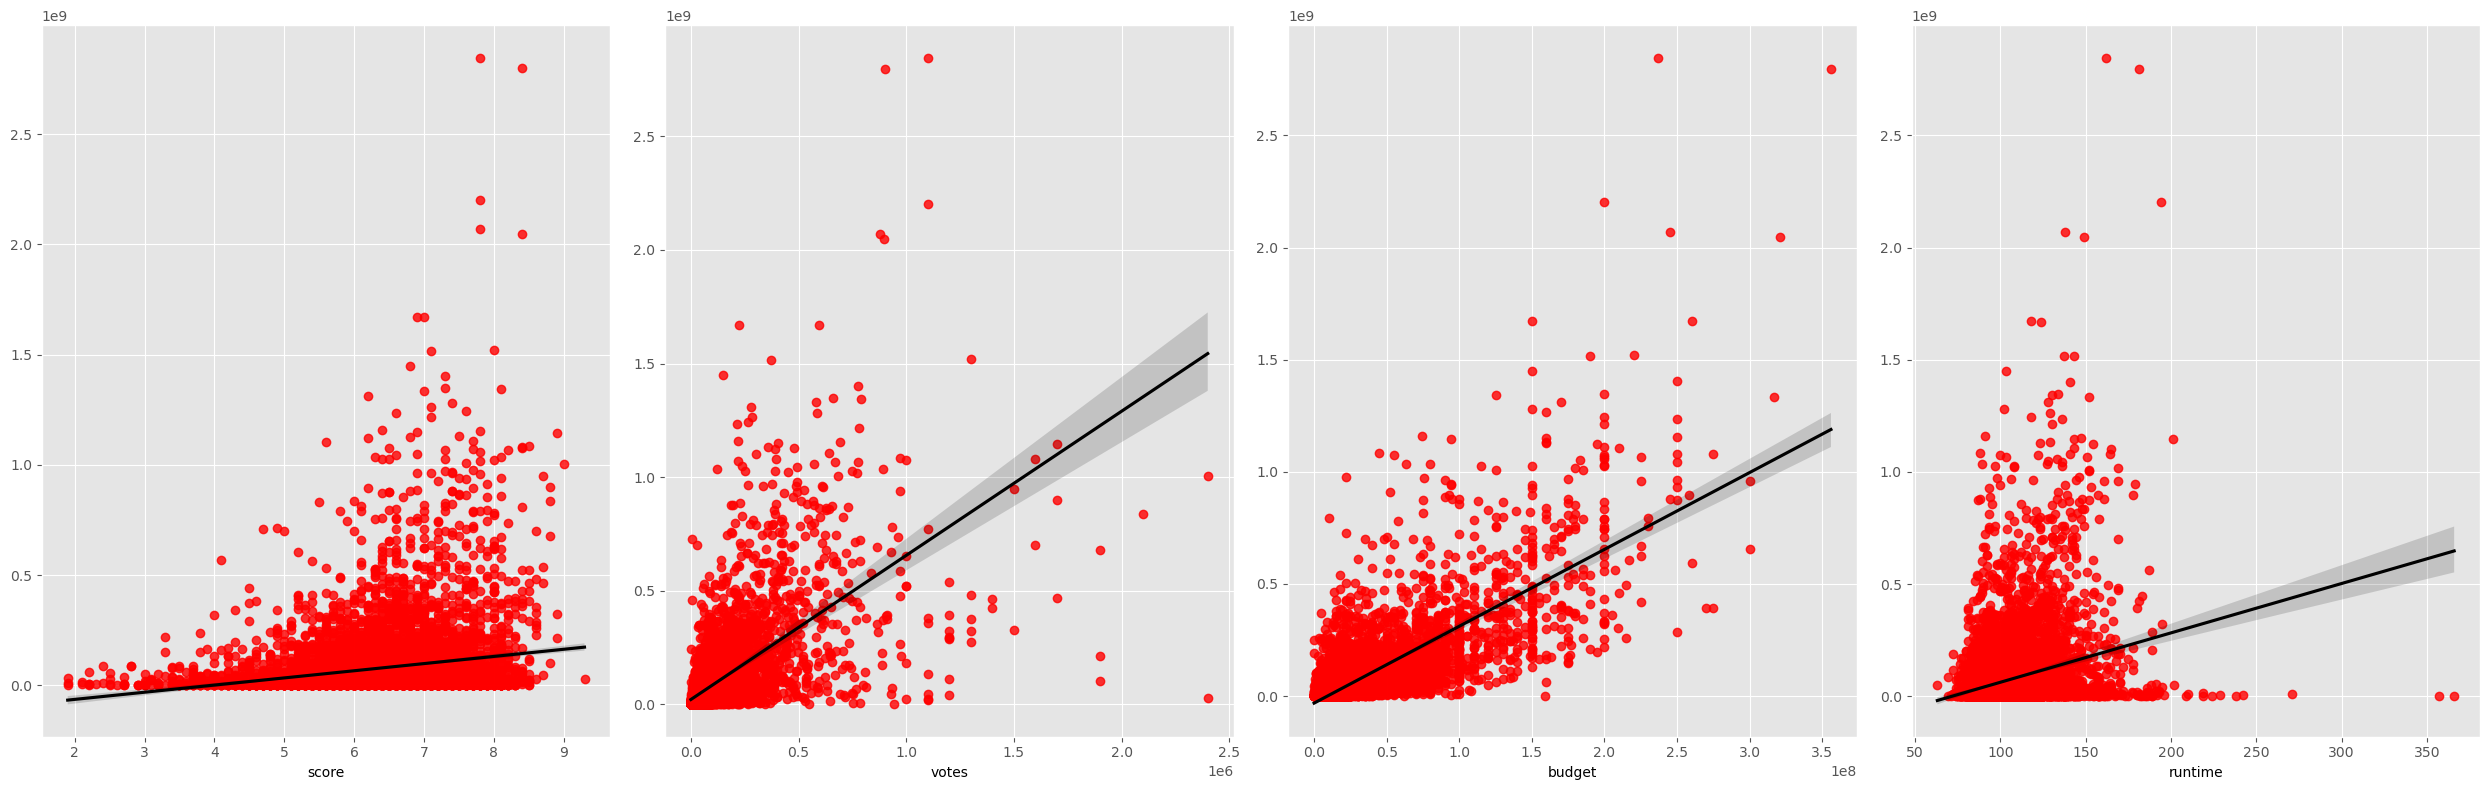

In [35]:
#declaring numeric variables
numeric = ['score', 'votes', 'budget', 'runtime']

#Create a grid of subplots
fig, axes = plt.subplots(1, 4, figsize = (25, 8))

#flatten the axes array to make it ID
axes = axes.ravel()

# loop through each subplot and plot sns.regplot
for i, col in enumerate(numeric):
    sns.regplot(x=col, y='gross', data = df, ax=axes[i], scatter_kws= {"color": "red"}, line_kws={"color":"black"})
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('')
    
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show

##### Knowing the exact correlation using pearson function

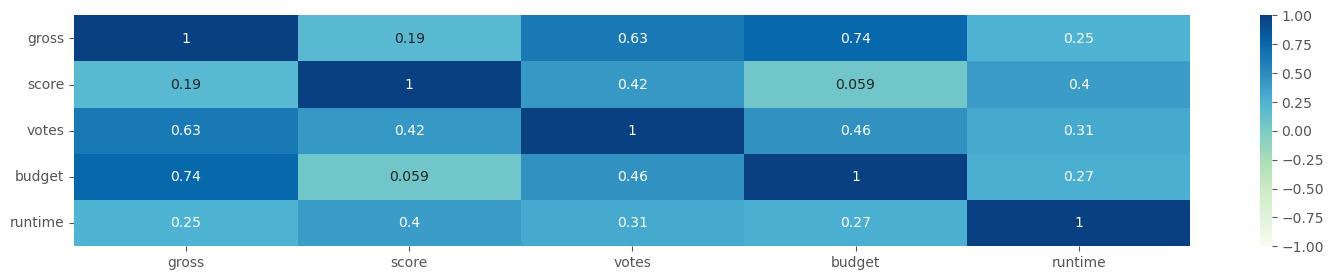

In [36]:
pearson_cor = df[['gross', 'score', 'votes', 'budget', 'runtime']].corr(method = 'pearson')

plt.figure(figsize = (18, 3))

sns.heatmap(pearson_cor,
           vmin = -1,
           vmax = 1,
           cmap = "GnBu",
           annot = True)

plt.show()

In [38]:
cat_list = ['name', 'rating', 'genre', 'director', 'writer', 'star', 'company', 'Years']

import statsmodels.api as sm
from statsmodels.formula.api import ols

for i in cat_list:
    formula = 'gross ~ {}'.format(i)
    model = ols(formula, data=df).fit()
    anova = sm.stats.anova_lm(model, typ=2)
    p_value = anova.iloc[0,3]
    
    print('p-value for gross ~ {}: {}'.format(i, p_value))


p-value for gross ~ name: 0.94966314088363
p-value for gross ~ rating: 1.3081899073664724e-99
p-value for gross ~ genre: 2.123992563094825e-179
p-value for gross ~ director: 4.2311527892537284e-89
p-value for gross ~ writer: 0.004341822809519859
p-value for gross ~ star: 5.2048852708495885e-09
p-value for gross ~ company: 1.4141186456628302e-15
p-value for gross ~ Years: 1.2723921755143281e-107


In [42]:
def mean_pairwise(cat_var):
    mean_by = df.groupby(cat_var)['gross'].mean()
    mean_by = pd.DataFrame(mean_by)
    mean_by = mean_by.sort_values(by=['gross'], inplace=False, ascending=False)
    
    return mean_by.head(5)


In [43]:
mean_pairwise('rating')

,gross
rating,
G,1.420433e+08
PG-13,1.309839e+08
TV-PG,1.202498e+08
PG,1.066129e+08
TV-MA,7.917078e+07


In [44]:
mean_pairwise('name')

,gross
name,
Avatar,2.847246e+09
Avengers: Endgame,2.797501e+09
Titanic,2.201647e+09
Star Wars: Episode VII - The Force Awakens,2.069522e+09
Avengers: Infinity War,2.048360e+09


In [45]:
mean_pairwise('genre')

,gross
genre,
Animation,2.413567e+08
Family,2.157876e+08
Action,1.458350e+08
Adventure,1.095587e+08
Mystery,1.011835e+08


In [46]:
mean_pairwise('director')


,gross
director,
Anthony Russo,1.368850e+09
Kyle Balda,1.097122e+09
Josh Cooley,1.073395e+09
Chris Buck,1.059909e+09
Lee Unkrich,9.373943e+08


In [47]:
mean_pairwise('writer')

,gross
writer,
Christopher Markus,1.083883e+09
Irene Mecchi,1.083721e+09
Rick Jaffa,1.076159e+09
Byron Howard,1.024121e+09
J.R.R. Tolkien,9.970720e+08


In [48]:
mean_pairwise('star')

,gross
star,
Donald Glover,1.670728e+09
Daisy Ridley,1.120174e+09
Neel Sethi,9.665549e+08
Craig T. Nelson,9.381233e+08
Chris Pratt,8.797427e+08


In [49]:
mean_pairwise('company')

,gross
company,
Marvel Studios,1.255466e+09
Illumination Entertainment,1.097122e+09
Fairview Entertainment,9.665549e+08
B24,8.806815e+08
Avi Arad Productions,8.560852e+08


In [50]:
mean_pairwise('Years')

,gross
Years,
2020,1.668662e+08
2017,1.475836e+08
2016,1.410022e+08
2018,1.407065e+08
2019,1.402180e+08
